In [ ]:
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
ms = DataReader('MS',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns = pd.DataFrame(np.diff(np.log(ms['Adj Close'].values)))
returns.index = ms.index.values[1:ms.index.values.shape[0]]
returns.columns = ['MS Returns']

In [ ]:
ms

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,40.720001,38.759998,39.020000,40.400002,10648000.0,38.113232
2019-01-03,40.220001,39.250000,40.220001,39.680000,13034500.0,37.433983
2019-01-04,41.580002,40.279999,40.500000,41.299999,14371600.0,38.962288
2019-01-07,42.160000,40.980000,41.509998,41.709999,11812400.0,39.349075
2019-01-08,42.410000,41.080002,42.299999,41.450001,11398200.0,39.103790
...,...,...,...,...,...,...
2019-08-26,40.270000,39.700001,39.840000,40.160000,10408600.0,38.696182
2019-08-27,40.340000,39.450001,40.250000,39.790001,8742900.0,38.339672
2019-08-28,40.700001,39.349998,39.400002,40.380001,9881900.0,38.908165


In [ ]:
ms1=ms[['Adj Close']]

In [ ]:
ms1

,Adj Close
Date,
2019-01-02,38.113232
2019-01-03,37.433983
2019-01-04,38.962288
2019-01-07,39.349075
2019-01-08,39.103790
...,...
2019-08-26,38.696182
2019-08-27,38.339672
2019-08-28,38.908165


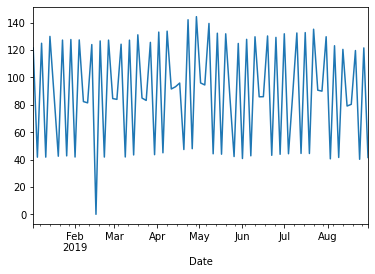

In [ ]:
ms.resample('3D').sum()['Close'].plot()

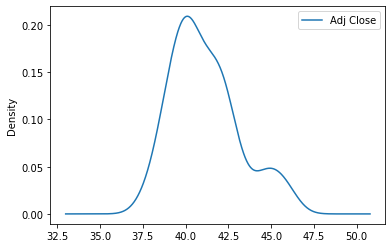

In [ ]:
 #kernel density plot 
 ax = ms1.plot.kde()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


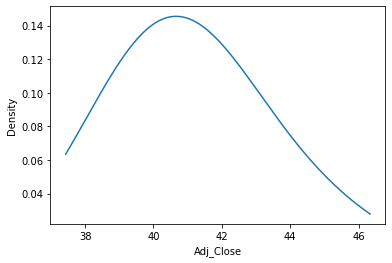

In [ ]:
ms.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
sns.kdeplot(ms.Adj_Close,bw=1,cut=0)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


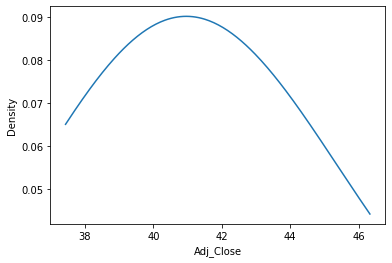

In [ ]:
sns.kdeplot(ms.Adj_Close,bw=2,cut=0)

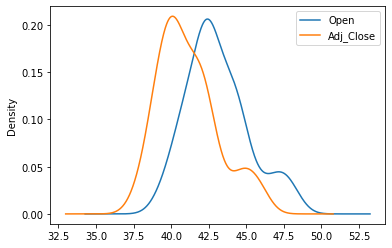

In [ ]:
ms2 =ms[['Open','Adj_Close']]
ax1 = ms2.plot.kde()


In [ ]:
X=ms.Close
X_range = np.sort(X)
mu = np.mean(X)
se = np.std(X)
print("True value of mu:", mu)
print("confidence interval of X", X_range[25], X_range[143])
T= ms1.shape[0]

B = 5000
mu_boot = np.zeros(B)
se_boot = np.zeros(B)
t_stat_boot = np.zeros(B)
for i in range(0, B):
     x_boot = X[np.random.choice(T,T)]
     mu_boot[i] = np.mean(x_boot)
     se_boot[i] = np.std(x_boot)/np.sqrt(T)
     t_stat_boot[i] = (mu_boot[i]-mu)/se_boot[i] 
     "Test whether mean from bootstrap sample = sample mean"
mu_boot = np.sort(mu_boot)
se_boot = np.sort(se_boot)
t_stat_boot = np.sort(t_stat_boot)

print("confidence interval of mu_boot:", mu_boot[25], mu_boot[143])
print("confidence interval of x estimated by Bootstrap", mu_boot[143]-t_stat_boot[143]*se, mu_boot[25]-t_stat_boot[25]*se)

True value of mu: 43.133511997404554
confidence interval of X 41.220001220703125 44.97999954223633
confidence interval of mu_boot: 42.72654778616769 42.834523791358585
confidence interval of x estimated by Bootstrap 46.923786266172854 48.570701604582645


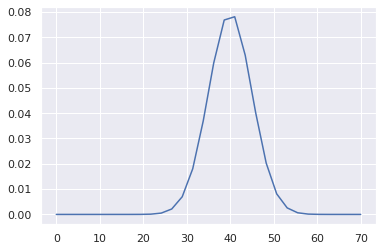

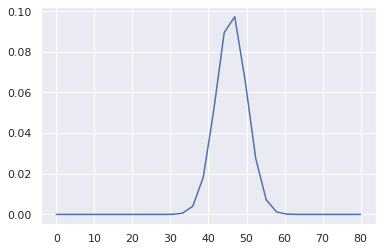

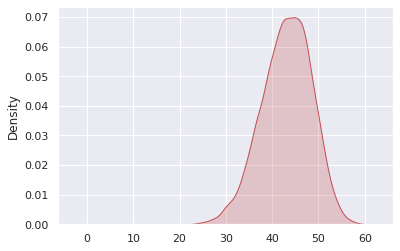

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)

'''Normal Distribution '''
mu_1 = 40;
Sigma1 =25; 
r1 = mu_1 + math.sqrt(Sigma1)*X;
''' Visualize y_1 = f(x_1) '''
sigma_1 = math.sqrt(Sigma1);
x_1 = np.linspace(0, 70, 30)
y_1 = ss.norm.pdf(x_1, mu_1, sigma_1)

plt.figure(1)
plt.plot(x_1, y_1)

mu_2 = 46;
Sigma2 = 16; 
r2 = mu_2 + math.sqrt(Sigma2)*X;
''' Visualize y_2 = f(x_2) '''
sigma_2 = math.sqrt(Sigma2);
x_2 = np.linspace(0, 80, 30)
y_2 = ss.norm.pdf(x_2, mu_2, sigma_2)
plt.figure(2)
plt.plot(x_2, y_2)

'''Normal Mixture'''
p = 0.5; 
S = 5000;
r = np.zeros(S);
y = np.zeros(S);
for s in range(1,S):
    eps = np.random.normal(0,1,1);
    r1 = mu_1 + math.sqrt(Sigma1)*eps;
    r2 = mu_2 + math.sqrt(Sigma2)*eps;
    u = np.random.uniform(0,1,1)
    r[s] = r1*(u<p)+r2*(u>=p);

plt.figure(3)
sns.kdeplot(r,shade=True, color="r");

Optimization terminated successfully.
         Current function value: 10.010470
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: OptimizeWarning: Unknown solver options: xtol


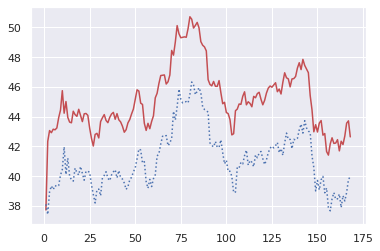

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def Kalman_Filter(Y):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = param0[0]
 T = param0[1]
 H = param0[2]
 Q = param0[3]
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 KF_Dens = np.zeros(S)
 for s in range(1,S):
  if s == 1: 
    P_update[s] = 1000
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
  else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]     
    Likelihood = np.sum(KF_Dens[1:-1])  
    return Likelihood


def Kalman_Smoother(params, Y):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = params[0]
 T = params[1]
 H = params[2]
 Q = params[3]
 
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 for s in range(1,S):
   if s == 1: 
    P_update[s] = 1000
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
   else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    u_smooth = np.zeros(S)
    P_smooth = np.zeros(S)
    u_smooth[S-1] = u_update[S-1]
    P_smooth[S-1] = P_update[S-1]    
 for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
 u_smooth = u_smooth[1:]
 return u_smooth

#T = 100
T = ms.shape[0]
Y = ms.Adj_Close
#param0 = np.array([1.3, 0.7, 0.8, 1])
param0 = np.array([0.9, 0.7, 10000000, 85000000])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Y,'b:')


In [ ]:
rmse=np.sqrt(np.mean((Y - u )**2))
rmse
print('RMSE is       \n',rmse)

RMSE is       
 4.02735761809085


         Current function value: 0.094380
         Iterations: 2
         Function evaluations: 149
         Gradient evaluations: 23


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: OptimizeWarning: Unknown solver options: xtol


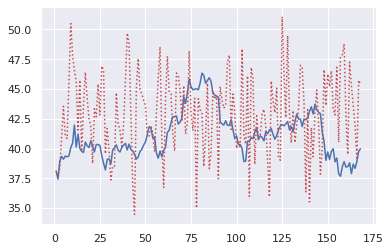

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def GARCH(Y):
 "Initialize Params:"
 mu = param0[0]
 omega = param0[1]
 alpha = param0[2]
 beta = param0[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)   
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
    Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood


def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.0001
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    


T = ms.shape[0]

Y=ms.Adj_Close

param0 = np.array([43, 9, 0.01, 0.1])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')

In [ ]:
rmse=np.sqrt(np.mean((Y - Y_GARCH )**2))
rmse

4.621473829184013

In [ ]:
print('RMSE is       \n',rmse)

RMSE is       
 4.621473829184013
